# Script Preparation

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Dataframe from Compiled Edit

## Compiled edit includes all sources of data and adjusts the -66,-77,and -88 values in the Polity IV data set.
### -66values represented cases where foreign interruption are treated as system missing. Systemic Peace converts these to missing values elsewhere, I do so here.
### -77 are interregnum or anarchy. Systemic Peace converts these to zero elsewhere, I do so here.
### -88 values are cases of transition. Systemic Peace prorates these transitions across '-88' values, I do so here.


In [2]:
file = '../data/compiled_edit.xlsx'
df = pd.read_excel (file,index_col=0,na_values=['..'])
print('file uploaded')

file uploaded


In [3]:
#create columns for lagged variables: 
#con_next, con1_next, con2_next, and con3_next are indicators for conflict generally and by type in the next year
# con_last1_qd and con_last2_qd are indicators for incidence in the previous two years respectively
nan_value = float("NaN")
df['con1_next'] = nan_value
df['con2_next'] = nan_value
df['con3_next'] = nan_value
df['con5_next'] = nan_value
df['con10_next'] = nan_value
df['con_last1_qd'] = nan_value
df['con_last2_qd'] = nan_value
print('lagged conflict columns created')

lagged conflict columns created


In [4]:
#These commands build two lagged variables and one, two, three, five, and ten year forward looking variables
df.loc[df['year'] >1989, 'con_last1_qd'] = df['con_in'].shift(1) 
df.loc[df['year'] >1990, 'con_last2_qd'] = df['con_in'].shift(2) 
df.loc[df['year'] <2018, 'con1_next'] = df['con_in'].shift(-1)
df.loc[df['year'] <2017, 'con2_next'] = df['con_in'].shift(-2)
df.loc[df['year'] <2016, 'con3_next'] = df['con_in'].shift(-3)
df.loc[df['year'] <2014, 'con5_next'] = df['con_in'].shift(-5)
df.loc[df['year'] <2009, 'con10_next'] = df['con_in'].shift(-10)

#Building our year forward looking variables per conflict type.
df.loc[df['year'] <2018, 'con1_1_next'] = df['con_in_1'].shift(-1)
df.loc[df['year'] <2018, 'con1_2_next'] = df['con_in_2'].shift(-1)
df.loc[df['year'] <2018, 'con1_3_next'] = df['con_in_3'].shift(-1)
print('lagged conflict variables created')

lagged conflict variables created


In [5]:
#Sums the three conflict incident columns to determine how many of the last three years for that country year included conflict
df['con_last3'] = df['con_in'] + df['con_last1_qd']+ df['con_last2_qd']
print('lagged conflict incidence sum complete')

lagged conflict incidence sum complete


## As a convention, I end all variables I intend to drop with 'qd' (quick drop)

In [6]:
#Drop the columns used to calculate the lagged conflict variables
df.columns.str.endswith('qd')
df=df.loc[:,~df.columns.str.endswith('qd')]
print('extra columns dropped')

extra columns dropped


# I drop rows that represent countries before they existed. This includes:
### The States that constitute the former Soviet Union
### Syria because Uppsala did not include this country in the dataset
### Bosnia and Herzegovina
### Croatia
### Eritrea
### Kosovo
### Montenegro
### Northern Macedonia
### Namibia
### Serbia
### Slovenia
### South Sudan
### Slovakia
### Timor Leste

In [7]:
#Drop former Soviet Union prior to 1990
indexNames = df[ (df['ccode'] == 'ARM') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'AZE') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'BLR') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'EST') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'GEO') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'KAZ') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'KGZ') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'LVA') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'LTU') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'MDA') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'RUS') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'TJK') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'TKM') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'UKR') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

indexNames = df[ (df['ccode'] == 'UZB') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

#Drop Syria Observations
indexNames = df[ (df['ccode'] == 'SYR')].index
df.drop(indexNames , inplace=True)

#Drop Bosnia and Herzogovina prior to 1992
indexNames = df[ (df['ccode'] == 'BIH') & (df['year'] <1992)].index
df.drop(indexNames , inplace=True)

#Drop Croatia prior to 1991
indexNames = df[ (df['ccode'] == 'HRV') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

#Drop Eritrea prior to 1992
indexNames = df[ (df['ccode'] == 'HRV') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

# Drop Kosovo prior to 2008
indexNames = df[ (df['ccode'] == 'XKX') & (df['year'] <2008)].index
df.drop(indexNames , inplace=True)

#Drop Montenegro prior to 2006
indexNames = df[ (df['ccode'] == 'MNE') & (df['year'] <2006)].index
df.drop(indexNames , inplace=True)

#Drop Northern Macedonia prior to 1991
indexNames = df[ (df['ccode'] == 'MKD') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

#Drop Namibia prior to 1990
indexNames = df[ (df['ccode'] == 'NAM') & (df['year'] <1990)].index
df.drop(indexNames , inplace=True)

#Drop Serbia prior to 1991
indexNames = df[ (df['ccode'] == 'SRB') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

#Drop Slovenia prior to 1991
indexNames = df[ (df['ccode'] == 'SVN') & (df['year'] <1991)].index
df.drop(indexNames , inplace=True)

#Drop South Sudan prior to 2011
indexNames = df[ (df['ccode'] == 'SSD') & (df['year'] <2011)].index
df.drop(indexNames , inplace=True)

#Drop Slovakia prior to 1993
indexNames = df[ (df['ccode'] == 'SVK') & (df['year'] <1993)].index
df.drop(indexNames , inplace=True)

#Drop Timore Leste prior to 2002
indexNames = df[ (df['ccode'] == 'TLS') & (df['year'] <2002)].index
df.drop(indexNames , inplace=True)


print('Nonexistant Country Years Dropped')

Nonexistant Country Years Dropped


## Pre-Imputed Summary Statistics for comparison later

In [8]:
sum_stats_pre = df.describe()

target = '../data/sum_stats_pre.xlsx'
sum_stats_pre.to_excel(target)
print('saved to '+target )

saved to ../data/sum_stats_pre.xlsx


# Evaluation of missing values

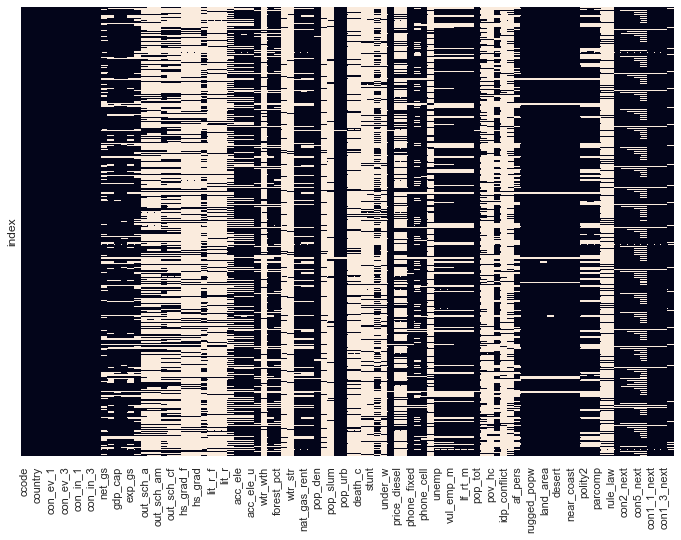

In [9]:
#This builds a plot of the missing values. Present values are represented by black bars and missing are represented by tan bars.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df.isnull(), cbar=False, yticklabels=0)

In [10]:
#Reports the percentage of values that are present in each variable.
columns=list(df)
for column in columns:
    df_col=df.loc[:,{'ccode',column}]
    count_na=sum(pd.isnull(df_col[column]))
    count_value=sum(pd.notnull(df_col[column]))
    pct_comp=round(100*(count_value/(count_na+count_value)),1)
    print(column+': '+ str(pct_comp)+'%')

    
#How to sort for easier readability?

ccode: 100.0%
year: 100.0%
country: 100.0%
region: 100.0%
con_ev_1: 100.0%
con_ev_2: 100.0%
con_ev_3: 100.0%
total_ev: 100.0%
con_in_1: 100.0%
con_in_2: 100.0%
con_in_3: 100.0%
con_in: 100.0%
net_gs: 75.8%
imp_gs: 82.9%
gdp_cap: 91.3%
gdp_cap_gr: 90.7%
exp_gs: 82.9%
inf: 76.8%
out_sch_a: 31.5%
out_sch_af: 25.0%
out_sch_am: 24.9%
out_sch_c: 48.0%
out_sch_cf: 34.4%
out_sch_cm: 34.4%
hs_grad_f: 14.7%
hs_grad_m: 14.7%
hs_grad: 14.7%
gov_ed: 43.8%
lit_r_f: 12.3%
lit_r_m: 12.3%
lit_r: 12.3%
acc_tech: 49.9%
acc_ele: 76.5%
acc_ele_r: 76.1%
acc_ele_u: 76.5%
ag_pct: 88.7%
wtr_wth: 8.2%
arable_pct: 87.8%
forest_pct: 87.0%
low_land_pct: 8.2%
wtr_str: 3.0%
min_rent: 88.1%
nat_gas_rent: 83.8%
oil_rent: 83.9%
pop_den: 98.5%
pop_den_low: 8.2%
pop_slum: 6.8%
pop_rural: 99.2%
pop_urb: 99.2%
death_nonc: 11.4%
death_c: 11.4%
sev_wast: 9.1%
stunt: 11.8%
under_n: 46.3%
under_w: 12.1%
pop_grow: 99.6%
price_diesel: 28.5%
price_gas: 28.8%
phone_fixed: 95.3%
pop_internet: 78.1%
phone_cell: 93.7%
mig_net: 18.0%


## Evaluation of Correlation between variables

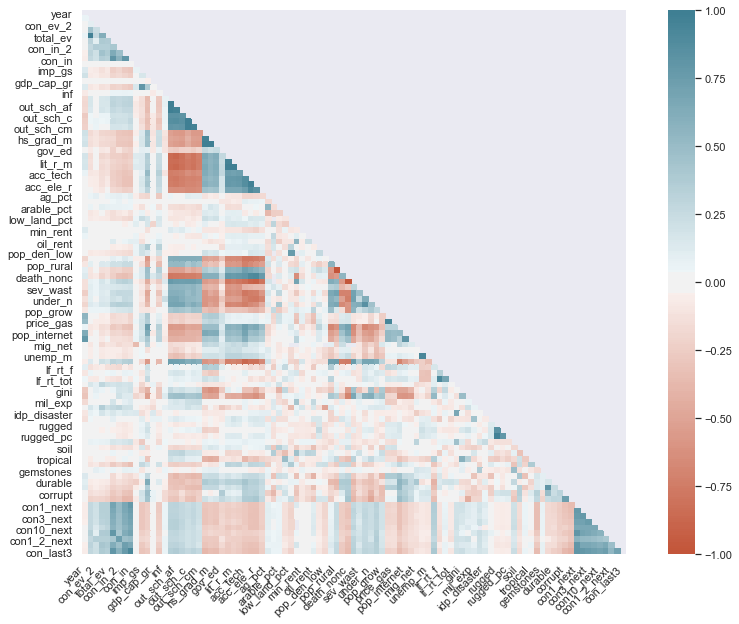

In [11]:
#This code creates a correlation matrix between the variables.

sns.set(rc={'figure.figsize':(15,10)})
corr = df.corr()
matrix = np.triu(corr)

ax = sns.heatmap(
    corr,
    mask = matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment = 'right'
);

In [12]:
#Saves the compiled data as a file ready for imputation.

target = '../data/impute_ready.xlsx'
df.to_excel(target)
print('saved to '+target )

saved to ../data/impute_ready.xlsx


In [13]:
df_1y=df.loc[:,{'ccode', 'year', 'region', 'con1_next', 'con_in', 'total_ev', 'net_gs', 'gdp_cap', 'exp_gs', 'inf', 'gov_ed', 'lit_r', 'acc_tech', 'acc_ele_r', 'acc_ele_u', 'ag_pct', 'arable_pct', 'forest_pct', 'low_land_pct', 'wtr_str', 'under_n', 'unemp', 'lf_rt_f', 'lf_rt_m', 'pop_tot', 'pov_hc', 'rugged', 'land_area', 'soil', 'desert', 'tropical', 'near_coast', 'gemstones', 'polity2', 'parcomp', 'corrupt', 'rule_law', 'con_last3'}]

df_1y = df_1y[['ccode', 'year', 'region', 'con1_next', 'con_in', 'total_ev', 'net_gs', 'gdp_cap', 'exp_gs', 'inf', 'gov_ed', 'lit_r', 'acc_tech', 'acc_ele_r', 'acc_ele_u', 'ag_pct', 'arable_pct', 'forest_pct', 'low_land_pct', 'wtr_str', 'under_n', 'unemp', 'lf_rt_f', 'lf_rt_m', 'pop_tot', 'pov_hc', 'rugged', 'land_area', 'soil', 'desert', 'tropical', 'near_coast', 'gemstones', 'polity2', 'parcomp', 'corrupt', 'rule_law', 'con_last3']]

#We drop 2018 observations since we have no data on 2019 conflict from our source
df_1y.drop(df_1y[(df_1y['year'] > 2017)].index, inplace = True)

print('Values Dropped')

Values Dropped


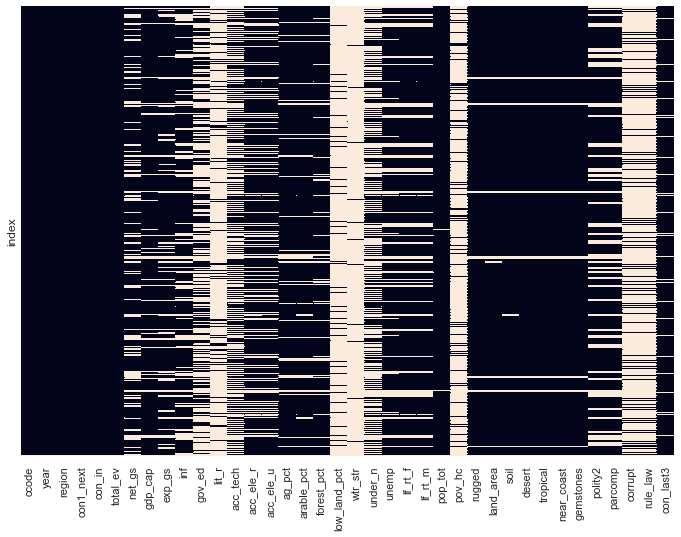

In [14]:
#This builds a plot of the missing values. Present values are represented by black bars and missing are represented by tan bars.
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df_1y.isnull(), cbar=False, yticklabels=0)

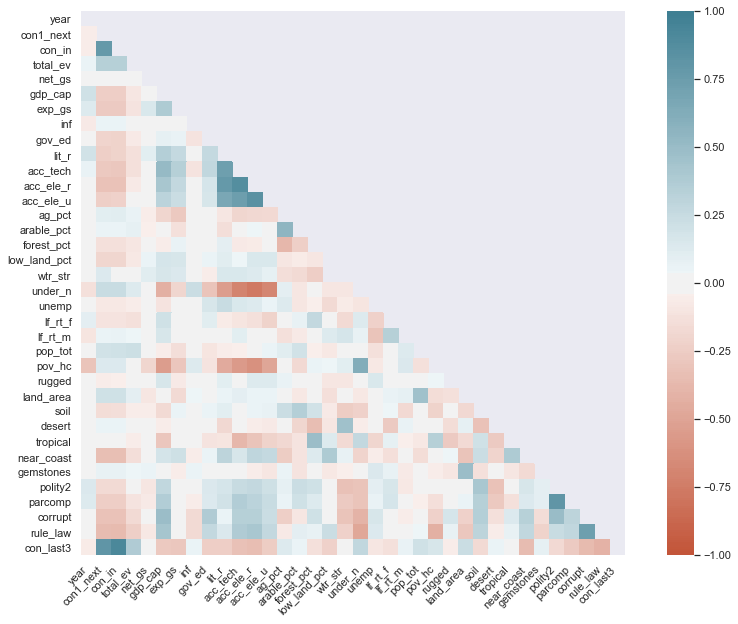

In [15]:
#correlation matrix for original specification
sns.set(rc={'figure.figsize':(15,10)})
corr = df_1y.corr()
matrix = np.triu(corr)

ax = sns.heatmap(
    corr,
    mask = matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment = 'right'
);

# I use this area to explore alternative specifications prior to imputation. I do not actually create either specification before imputation.

In [16]:
#This is the specification I eventually used for the alternative models.
#This code began with each variable. I removed variables based on three criteria. 
#First, I removed all variables missing more than 80% of the values. 
#Second, I removed variables that had obvious collinearity (i.e. I removed rural population percentage as it is equal to 100-urban population percentage). 
#Finally, I referenced the below correlation matrix to remove one of a pair variables with large correlations. I chose the variable to keep based on which value was more complete.
df2 = df[['ccode', 'year', 'country', 'region', 'con_ev_1', 'con_ev_2', 'con_ev_3', 'total_ev', 'con_in_1', 'con_in_2', 'con_in_3', 'con_in', 'net_gs', 'gdp_cap', 'gdp_cap_gr', 'inf', 'out_sch_a','out_sch_c', 'gov_ed', 'acc_ele', 'ag_pct', 'arable_pct', 'forest_pct', 'min_rent', 'nat_gas_rent', 'oil_rent', 'pop_den', 'pop_urb', 'under_n', 'pop_grow', 'price_gas', 'phone_fixed', 'phone_cell', 'unemp', 'vul_emp_m', 'lf_rt_f', 'lf_rt_m', 'pop_tot', 'gini', 'mil_exp', 'af_pers', 'rugged', 'land_area', 'soil', 'desert', 'tropical', 'near_coast', 'gemstones', 'polity2', 'durable', 'parcomp', 'con1_next', 'con2_next', 'con3_next', 'con5_next', 'con10_next', 'con_last3']]

In [17]:
df2.shape

(6364, 57)

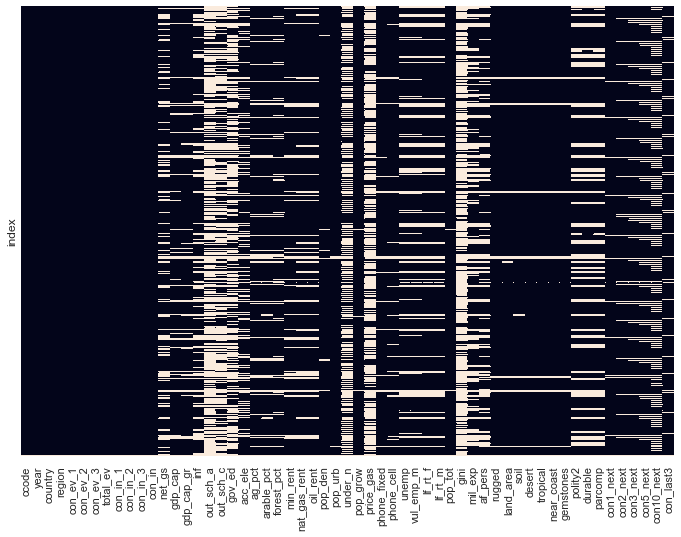

In [18]:
#Missing values matrix for the new specification
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(df2.isnull(), cbar=False, yticklabels=0)

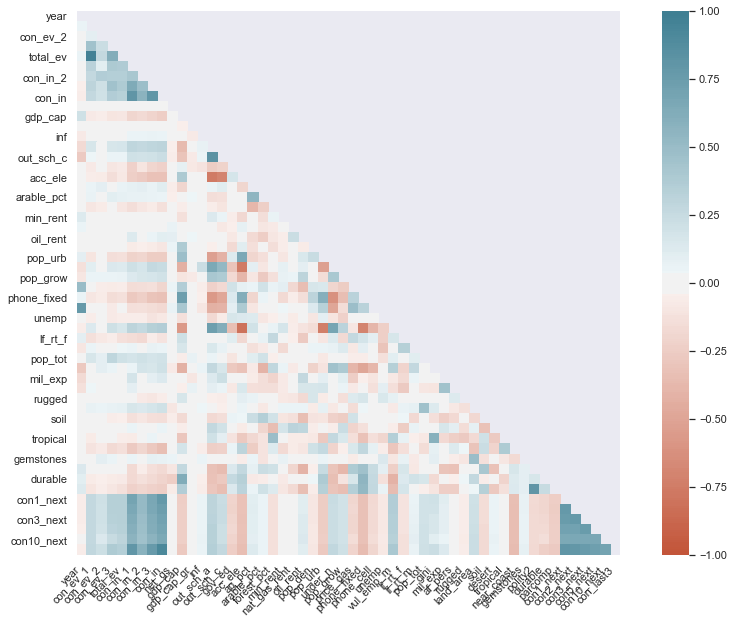

In [19]:
#Correlation Matrix
sns.set(rc={'figure.figsize':(15,10)})
corr = df2.corr()
matrix = np.triu(corr)

ax = sns.heatmap(
    corr,
    mask = matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20,220,n=200),
    square=True
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment = 'right'
);